# Kullback-Leibler Divergence

> Investigating how KL divergence is calculated and why it is useful to reinforcement learning.

Kullback-Leibler divergence is described as a measure of “suprise” of a distribution given an expected distribution. For example, when the distributions are the same, then the KL-divergence is zero. When the distributions are dramatically different, the KL-divergence is large.

It is also used to calculate the extra number of bits required to describe a new distribution given another. For example, if the distributions are the same, then no extra bits are required to identify the new distribution. If the distributions are different, then many bits, potentially as many bits required to represent the whole new distribution, are required to identify the new distribution.

It is defined as:

$$D_{KL}(P \mid \mid Q) = \sum_{x \in \mathcal{X}} P(x) \operatorname*{log} \bigg( \frac{P(x)}{Q(x)}  \bigg)$$

Below I present some practical examples to aid your understanding.

## Setup

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## KL-divergence function

In [ ]:
def kld(p: np.ndarray, q: np.ndarray) -> float:
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    relative_entropy = p * np.log2(p / q, where=p != 0)
    return np.sum(relative_entropy, where=np.isfinite(relative_entropy))

## Experiment 1
In the first experiment I consider flips of a coin. KL divergence is a measure of how different distributions are. So first, as a sanity check, I simulate two fair coin flips. We will calculate the KL divergence and check that it is zero.

Then I simulate a biased coin that is weighted towards landing on tails (denoted by 1).

In [ ]:
x = np.array([0,1]) # Fair coin flips
f_x = lambda: np.random.choice(x) # Simulation function
x_b = np.array([0,1,1,1]) # Unfair coin flips
f_x_b = lambda: np.random.choice(x_b) # Simulation function
trials_fair_0 = []
trials_fair_1 = []
trials_biased = []
for i in range(1000):
    trials_fair_0.append(f_x())
    trials_fair_1.append(f_x())
    trials_biased.append(f_x_b())

## Experiment 2
In the second experiment I simulate three six-sided dice. The first is a standard, fair die. The second is a fair die but produces double the value of a standard six-sided die. In other words, the probabilities are similar but the distributions do not perfectly overlap. The third die produces standard values but is biased to produces more sixes than you would expect.

In [ ]:
x = np.arange(1,7) # dice values

# Initialise first die
f_x = lambda: np.random.choice(x)

# Initialise the second die
f_b_0 = lambda: np.random.choice(x) * 2

# Initialise the third die
weights = x / np.sum(x) # a die weighted towards rolling sixes
f_b_1 = lambda: np.random.choice(x, p=weights/weights.sum())

In [ ]:
trials_fair_die = []
trials_biased_die_0 = []
trials_biased_die_1 = []
for i in range(1000):
    trials_fair_die.append(f_x())
    trials_biased_die_0.append(f_b_0())
    trials_biased_die_1.append(f_b_1())

## Plots

The KL Divergence from fair coin 0 to fair coin 1 is 0.0029571128769896454
The KL Divergence from fair coin 0 to biased coin is 0.1704186983091323
The KL Divergence from fair to biased die 0 is -0.0313339296329827
The KL Divergence from fair to biased die 1 is 0.22814899706942637


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


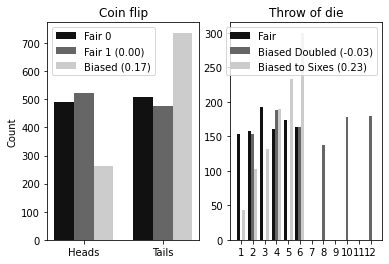

In [ ]:
forground_colours = [
    '#111111',
    '#666666',
    '#CCCCCC',
]

fig, ax = plt.subplots(nrows=1, ncols=2)

# The data
h_f_0, _ = np.histogram(trials_fair_0, bins=np.linspace(-0.5, 1.5, 3))
h_f_1, _ = np.histogram(trials_fair_1, bins=np.linspace(-0.5, 1.5, 3))
h_b, _ = np.histogram(trials_biased, bins=np.linspace(-0.5, 1.5, 3))
indices = np.array([0, 1])
names = ['Heads','Tails']
# Calculate optimal width
width = np.min(np.diff(indices))/4.

p_f_0 = h_f_0 / np.sum(h_f_0)
p_f_1 = h_f_1 / np.sum(h_f_1)
p_b = h_b / np.sum(h_b)
print(f"The KL Divergence from fair coin 0 to fair coin 1 is {kld(p_f_0, p_f_1)}")
print(f"The KL Divergence from fair coin 0 to biased coin is {kld(p_f_0, p_b)}")

ax[0].bar(indices-width,h_f_0,width,color=forground_colours[0],label='Fair 0')
ax[0].bar(indices,h_f_1,width,color=forground_colours[1],label=f"Fair 1 ({kld(p_f_0, p_f_1):.2f})")
ax[0].bar(indices+width,h_b,width,color=forground_colours[2],label=f'Biased ({kld(p_f_0, p_b):.2f})')
ax[0].set_xticks(indices)
ax[0].set_xticklabels(names)
ax[0].set_ylabel("Count")
ax[0].set_title("Coin flip")
ax[0].legend(loc='best')

# The data
h_f, _ = np.histogram(trials_fair_die, bins=np.linspace(0.5, 12.5, 13))
h_b_0, _ = np.histogram(trials_biased_die_0, bins=np.linspace(0.5, 12.5, 13))
h_b_1, _ = np.histogram(trials_biased_die_1, bins=np.linspace(0.5, 12.5, 13))
indices = np.linspace(1, 12, 12)
# Calculate optimal width
width = np.min(np.diff(indices))/4.


p_f = h_f / np.sum(h_f)
p_b_0 = h_b_0 / np.sum(h_b_0)
p_b_1 = h_b_1 / np.sum(h_b_1)
print(f"The KL Divergence from fair to biased die 0 is {kld(p_f, p_b_0)}")
print(f"The KL Divergence from fair to biased die 1 is {kld(p_f, p_b_1)}")

ax[1].bar(indices-width,h_f,width,color=forground_colours[0],label='Fair')
ax[1].bar(indices,h_b_0,width,color=forground_colours[1],label=f'Biased Doubled ({kld(p_f, p_b_0):.2f})')
ax[1].bar(indices+width,h_b_1,width,color=forground_colours[2],label=f'Biased to Sixes ({kld(p_f, p_b_1):.2f})')
ax[1].set_xticks(indices)
ax[1].set_title("Throw of die")
ax[1].legend(loc='best')
plt.savefig("kl_divergence_coin_die.png", dpi=300)
plt.show()

You can see that the KL divergence between the two fair coins is zero, as expected. The biased coin is non-zero. The KL divergence implementation above uses log2 as the logarithm. This equates to the number of extra bits that would be required to re-explain the distribution. It is a measure of the difference in binary entropy.

In the dice experiment, note how the KL divergence between the standard and doubled dice is nearly zero. This is because KL divergence does not measure the spread between distributions. If you are interested in that, try the total variance divergence instead. Then, similar to the biased coin, the biased die is non-zero because the distributions are measurably different.